# DEEP LEARNING (DLE602)


## ASSESSMENT 1
### MODEL DEVELOPMENT USING 2 CHOSEN DATASET
http://thinknook.com/twitter-sentiment-analysis-training-corpus-dataset-2012-09-22/


### By:
### HASSAN YA’U HAMISU - A00133000

#### Due Date: Sunday, 13/10/2024 @ 11:55 PM

#MANUAL
## Developed on:
- Google Colab

## Packeges Used:
1. Data Manipulation and Display
- pandas: For handling and manipulating data in DataFrames.
- numpy: For numerical operations and efficient array handling.
2. Text Processing and NLP
- re: Regular expressions for text cleaning.
- nltk: The Natural Language Toolkit for NLP tasks such as tokenization, - stopwords removal, and lemmatization.
  - Sub-packages/modules used:
    - nltk.corpus.stopwords
    - nltk.tokenize.word_tokenize
    - nltk.stem.WordNetLemmatizer
    - Downloads needed:
      - nltk.download('punkt')
      - nltk.download('stopwords')
      - nltk.download('wordnet')
3. Vectorization and Feature Extraction
- scikit-learn (sklearn): A comprehensive machine learning library used for vectorization and modeling.
- Sub-packages/modules used:
    - sklearn.feature_extraction.text.CountVectorizer: For creating N-gram vectors.
    - sklearn.model_selection.train_test_split: For splitting the dataset.
    - sklearn.linear_model.LogisticRegression: For applying Logistic Regression with regularization.
    - sklearn.metrics.accuracy_score and sklearn.metrics.classification_report: For evaluating model performance.
    - sklearn.linear_model.SGDClassifier: For Elastic Net regularization (optional, if needed).
4. Batch Processing and Parallel Execution
- scipy.sparse: For handling sparse matrices efficiently, specifically csr_matrix.
- joblib: For parallel processing to speed up classification tasks on large datasets (used with Parallel and delayed).
5. Data Visualization
- matplotlib: For creating visualizations like histograms and bar charts to analyze text length distribution and class distribution.
- Sub-packages/modules used:
matplotlib.pyplot
- wordcloud: For generating word clouds to visualize common words in the dataset.
6. File Handling and Serialization
- pickle: For saving and loading the vectorizer and lexicons.
- google.colab (if running on Google Colab): For downloading files directly from the Colab environment.
google.colab.files module used.
7. Miscellaneous
- tqdm: For displaying progress bars during batch processing (optional but helpful for monitoring long-running tasks).
##Installing the Packages:
Run the following command
- pip install pandas numpy scikit-learn matplotlib wordcloud nltk scipy joblib tqdm


# Stage 1: Business Understanding
## 1.1 Determining Business Objectives
### 1.1.1 Background:
Sentiment analysis is used to determine the sentiment (positive, negative, or neutral) expressed in textual data, such as social media posts. This helps businesses understand customer opinions and manage brand reputation effectively.

### 1.1.2 Business Objectives:
Develop a sentiment analysis model using the N-Gram probabilistic approach to classify Twitter texts into positive, negative, or neutral categories. The model must classify texts based on the rule that if one-fourth of the N-Grams in the text are positive, the text is labeled as positive; if one-fourth are negative, it is labeled as negative; otherwise, it is neutral.

# Stage 2: Data Understanding
## 2.1 Collecting Initial Data
### 2.1.1 Initial Data Collection Report:
The dataset training.1600000.processed.noemoticon.csv contains Twitter texts and their associated labels indicating sentiment.

In [1]:
# Import all required libraries
import pandas as pd
from IPython.display import display
import matplotlib.pyplot as plt
import numpy as np
from wordcloud import WordCloud
from tqdm import tqdm
import re
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import WordNetLemmatizer
import nltk
from sklearn.model_selection import train_test_split
from scipy.sparse import csr_matrix
import pickle
from google.colab import files
from sklearn.metrics import classification_report, accuracy_score
from sklearn.linear_model import LogisticRegression
from google.colab import files


# To Run on Google Drive
!pip install PyDrive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Load the dataset (adjust the path based on the location in your Drive)
dataset_path = '/content/drive/My Drive/Colab Notebooks/ISY503 Codes/Ass. 1 Codes/datasets/second/Sentiment Analysis Dataset.csv'  # Replace with your actual path
# Use the 'on_bad_lines='skip'' argument to skip problematic lines instead of 'error_bad_lines=False'
data = pd.read_csv(dataset_path, names=['ItemID', 'Sentiment', 'SentimentSource', 'SentimentText'], header=0, on_bad_lines='skip')

# Display basic info and preview data
df_info = data.info() # Changed df to data
df_head = data.head() # Changed df to data

df_info, df_head

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578612 entries, 0 to 1578611
Data columns (total 4 columns):
 #   Column           Non-Null Count    Dtype 
---  ------           --------------    ----- 
 0   ItemID           1578612 non-null  int64 
 1   Sentiment        1578612 non-null  int64 
 2   SentimentSource  1578612 non-null  object
 3   SentimentText    1578612 non-null  object
dtypes: int64(2), object(2)
memory usage: 48.2+ MB


(None,
    ItemID  Sentiment SentimentSource  \
 0       1          0    Sentiment140   
 1       2          0    Sentiment140   
 2       3          1    Sentiment140   
 3       4          0    Sentiment140   
 4       5          0    Sentiment140   
 
                                        SentimentText  
 0                       is so sad for my APL frie...  
 1                     I missed the New Moon trail...  
 2                            omg its already 7:30 :O  
 3            .. Omgaga. Im sooo  im gunna CRy. I'...  
 4           i think mi bf is cheating on me!!!   ...  )

In [3]:
# view the last part of the dataset
data.tail()

,ItemID,Sentiment,SentimentSource,SentimentText
1578607,1578623,1,Sentiment140,Zzzzzz.... Finally! Night tweeters!
1578608,1578624,1,Sentiment140,"Zzzzzzz, sleep well people"
1578609,1578625,0,Sentiment140,ZzzZzZzzzZ... wait no I have homework.
1578610,1578626,0,Sentiment140,"ZzZzzzZZZZzzz meh, what am I doing up again?"
1578611,1578627,0,Sentiment140,"Zzzzzzzzzzzzzzzzzzz, I wish"


In [4]:
# Describing the dataset
data.describe()

,ItemID,Sentiment
count,1.578612e+06,1.578612e+06
mean,7.893204e+05,5.005518e-01
std,4.557074e+05,4.999999e-01
min,1.000000e+00,0.000000e+00
25%,3.946658e+05,0.000000e+00
50%,7.893215e+05,1.000000e+00
75%,1.183974e+06,1.000000e+00
max,1.578627e+06,1.000000e+00


## 2.3 Verifying Data Quality
### 2.3.1 Data Quality Report:
Check for missing values and ensure data consistency.

Checking for missing values...
ItemID             0
Sentiment          0
SentimentSource    0
SentimentText      0
dtype: int64
Checking for duplicates...
0
Analyzing text length distribution...


Adding count labels: 100%|██████████| 50/50 [00:00<00:00, 3279.62it/s]


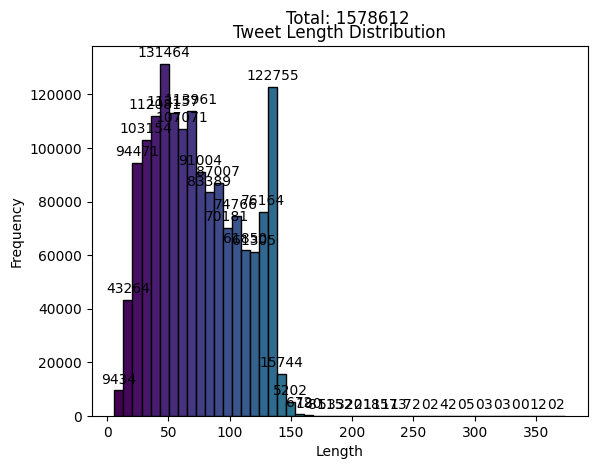

Checking class distribution...


Adding count labels: 100%|██████████| 2/2 [00:00<00:00, 1474.27it/s]


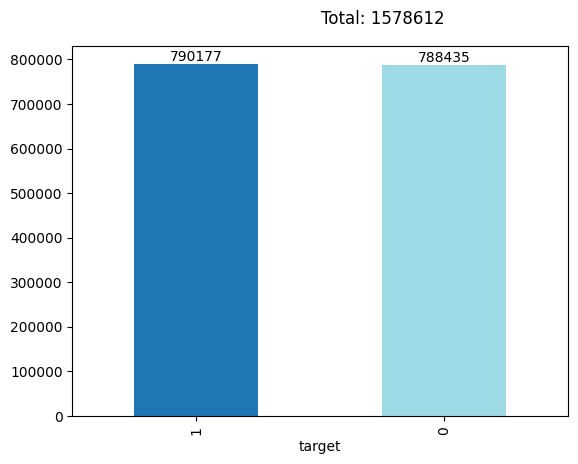

Generating word cloud...


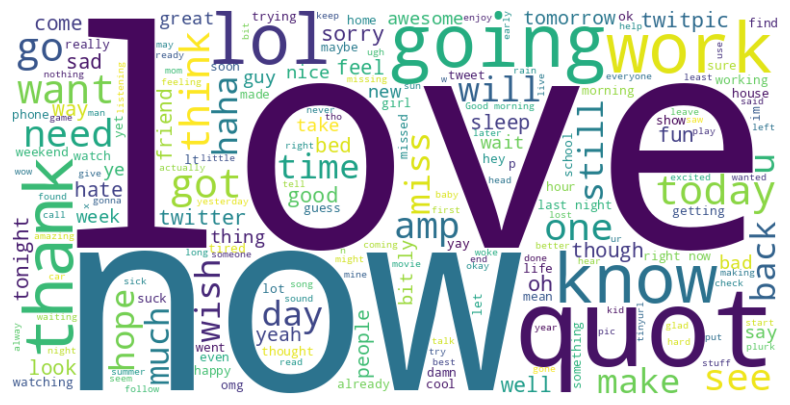

In [5]:
# Checking for missing values
print("Checking for missing values...")
missing_values = data.isnull().sum()
print(missing_values)

# Check for duplicates
print("Checking for duplicates...")
print(data.duplicated().sum())

# Analyze text length distribution
print("Analyzing text length distribution...")
# Convert the 'SentimentText' column to string type before calculating length
data['text_length'] = data['SentimentText'].astype(str).str.len()
counts, bins = np.histogram(data['text_length'], bins=50)
bins_center = 0.5 * (bins[:-1] + bins[1:])

fig, ax = plt.subplots()
bars = ax.bar(bins_center, counts, width=np.diff(bins), edgecolor='black', color=plt.cm.viridis(np.linspace(0, 1, len(bins_center))))
ax.set_title('Tweet Length Distribution')
ax.set_xlabel('Length')
ax.set_ylabel('Frequency')

# Adding count labels on top of each bar
for bar in tqdm(bars, desc="Adding count labels"):
    height = bar.get_height()
    ax.annotate(f'{height}', xy=(bar.get_x() + bar.get_width() / 2, height), xytext=(0, 3), textcoords="offset points", ha='center', va='bottom')

# Adding cumulative total at the top center
total = data['text_length'].count()
plt.text(ax.get_xlim()[1] / 2, ax.get_ylim()[1] * 1.05, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# Check class distribution
print("Checking class distribution...")
# 'Sentiment' represents the target variable, rename it to 'target'
data['target'] = data['Sentiment']
ax = data['target'].value_counts().plot(kind='bar', color=plt.cm.tab20(np.linspace(0, 1, data['target'].nunique())))


# Adding count labels on top of each bar
for p in tqdm(ax.patches, desc="Adding count labels"):
    ax.annotate(str(p.get_height()), (p.get_x() + p.get_width() / 2, p.get_height()), ha='center', va='bottom')

# Adding cumulative total at the top center
total = data['target'].count()
plt.text(ax.get_xlim()[1] / 2, ax.get_ylim()[1] * 1.05, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.show()

# Display common words using a word cloud
print("Generating word cloud...")
# Use the 'SentimentText' column for word cloud generation
text = ' '.join(data['SentimentText'].astype(str))
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(text)
plt.figure(figsize=(10, 5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()


### 2.3.2 Checking & Removing Outliers:
Identify and remove extremely short or long texts.

In [6]:
# Filtering very short and long texts
short_texts_new = data[data['SentimentText'].str.len() < 7]
long_texts_new = data[data['SentimentText'].str.len() > 300]

short_texts_count_new = short_texts_new.shape[0]
long_texts_count_new = long_texts_new.shape[0]

short_texts_count_new, long_texts_count_new


# Filtering very short and long texts
short_texts_new = data[data['SentimentText'].str.len() < 7]
long_texts_new = data[data['SentimentText'].str.len() > 300]

short_texts_count_new = short_texts_new.shape[0]
long_texts_count_new = long_texts_new.shape[0]

# Displaying the long tweets in tabular form
long_texts_new = data[data['SentimentText'].str.len() > 300]

# Display the DataFrame with long tweets
print(long_texts_new)

short_texts_count_new, long_texts_count_new

# Display the DataFrame with long tweets
display(long_texts_new)

# Dropping the long tweets
data = data[data['SentimentText'].str.len() <= 300]

# Display the updated DataFrame
print(data)

short_texts_count_new, long_texts_count_new

data.info()

          ItemID  Sentiment SentimentSource  \
122771    122784          1    Sentiment140   
168029    168042          1    Sentiment140   
195444    195457          1    Sentiment140   
205553    205566          1    Sentiment140   
242676    242689          1    Sentiment140   
396369    396382          0    Sentiment140   
472709    472722          1    Sentiment140   
551158    551174          1    Sentiment140   
695200    695216          1    Sentiment140   
792425    792441          0    Sentiment140   
1087305  1087321          1    Sentiment140   

                                             SentimentText  text_length  \
122771   @catfish_ohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸?à¸²à¸£à¹Œ...          374   
168029   @doax ì–´ì°¨í”¼ bandwidthëŠ” ë¶„ì‚° íŒŒì?¼ ì‹œ...          312   
195444   @iannnnn à¹€à¸”à¸µà¹‹à¸¢à¸§à¸­à¸µà¸?à¸‹à¸±à¸?à...          369   
205553    @laches [æˆ‘çš„èª å¯¦å…­å››å›žæ†¶] æœ€è¿‘è·Ÿä...          314   
242676   @KaewGB à¸­à¹‹à¸­  à¹€à¸„à¸¢à¸–à¸²à¸¡à¹†à¹ƒà¸™...  

,ItemID,Sentiment,SentimentSource,SentimentText,text_length,target
122771,122784,1,Sentiment140,@catfish_ohm à¹€à¸„à¹‰à¸²à¹ƒà¸«à¹‰à¸?à¸²à¸£à¹Œ...,374,1
168029,168042,1,Sentiment140,@doax ì–´ì°¨í”¼ bandwidthëŠ” ë¶„ì‚° íŒŒì?¼ ì‹œ...,312,1
195444,195457,1,Sentiment140,@iannnnn à¹€à¸”à¸µà¹‹à¸¢à¸§à¸­à¸µà¸?à¸‹à¸±à¸?à...,369,1
205553,205566,1,Sentiment140,@laches [æˆ‘çš„èª å¯¦å…­å››å›žæ†¶] æœ€è¿‘è·Ÿä...,314,1
242676,242689,1,Sentiment140,@KaewGB à¸­à¹‹à¸­ à¹€à¸„à¸¢à¸–à¸²à¸¡à¹†à¹ƒà¸™...,328,1
396369,396382,0,Sentiment140,@neospace à¹€à¸£à¸·à¹ˆà¸­à¸‡à¸•à¸±à¹‰à¸‡à¸žà¸£...,359,0
472709,472722,1,Sentiment140,@thanr à¹€à¸”à¸µà¹‹à¸¢à¸§à¹€à¸­à¸²à¸£à¸²à¸„à¸²...,326,1
551158,551174,1,Sentiment140,5 days till new top gear î?•î?•î?•î?•î?•î?•î?...,359,1
695200,695216,1,Sentiment140,ê·¼ë?° ë–¡ë°¥ì?´ì—ˆìœ¼ë‹ˆ ì±…ìž„ì§€ê³ ëŒ€ ë„¤...,313,1
792425,792441,0,Sentiment140,human shield à®Žà®©à¯?à®± à®šà¯Šà®±à¯?à®¤à¯Šà®...,348,0


          ItemID  Sentiment SentimentSource  \
0              1          0    Sentiment140   
1              2          0    Sentiment140   
2              3          1    Sentiment140   
3              4          0    Sentiment140   
4              5          0    Sentiment140   
...          ...        ...             ...   
1578607  1578623          1    Sentiment140   
1578608  1578624          1    Sentiment140   
1578609  1578625          0    Sentiment140   
1578610  1578626          0    Sentiment140   
1578611  1578627          0    Sentiment140   

                                             SentimentText  text_length  \
0                             is so sad for my APL frie...           61   
1                           I missed the New Moon trail...           51   
2                                  omg its already 7:30 :O           37   
3                  .. Omgaga. Im sooo  im gunna CRy. I'...          132   
4                 i think mi bf is cheating on me!!!   ...  

### 2.3.3 Randomizing the Dataset:
Randomize the dataset for unbiased training.

In [7]:
# Shuffle the dataset
data = data.sample(frac=1).reset_index(drop=True)

## 2.4 Data Exploration
### 2.4.1 Data Exploration Report:
Visualize sentiment distribution to understand class balance.

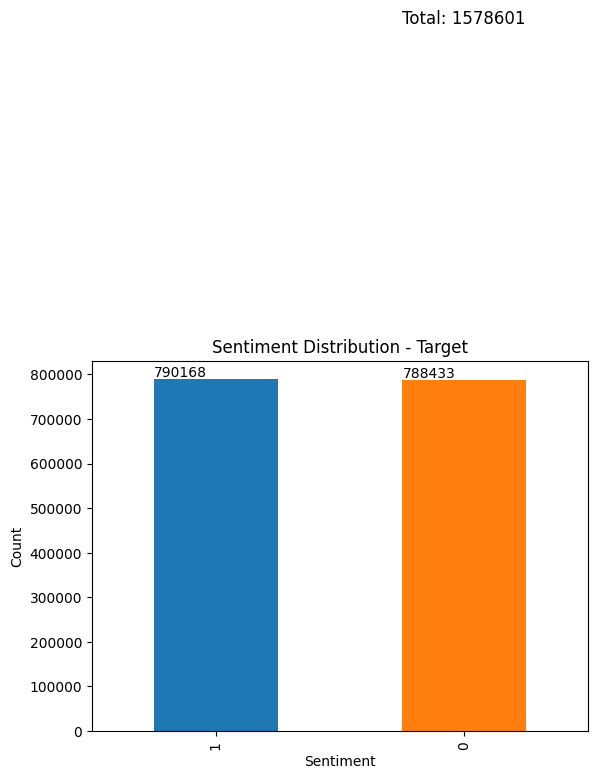

In [8]:
# Plotting sentiment distribution
ax = data['target'].value_counts().plot(kind='bar', color=['#1f77b4', '#ff7f0e', '#2ca02c', '#d62728', '#9467bd'])

# Adding count labels on top of each bar
for p in ax.patches:
    ax.annotate(str(p.get_height()), (p.get_x() * 1.005, p.get_height() * 1.005))

# Adding cumulative total at the top center
total = data['target'].value_counts().sum()
plt.text(len(data['target'].value_counts()) / 2, total, f'Total: {total}', ha='center', va='bottom', fontsize=12, color='black')

plt.title('Sentiment Distribution - Target')
plt.xlabel('Sentiment')
plt.ylabel('Count')
plt.show()

# Stage 3: Data Preparation
## 3.1 Selecting Data
### 3.1.1 Rationale for Inclusion/Exclusion:
Keeping only the tweet/text and target columns for analysis.

In [9]:
# Selecting relevant columns
data = data[['SentimentText', 'target']]
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1578601 entries, 0 to 1578600
Data columns (total 2 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   SentimentText  1578601 non-null  object
 1   target         1578601 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 24.1+ MB


## 3.2 Cleaning Data
### 3.2.1 Data Cleaning Report:
Convert text to lowercase, remove URLs, mentions, punctuation, and extra spaces.

In [10]:
# Define the text cleaning function
def clean_text(text):
    text = text.lower()
    text = re.sub(r'http\S+|www\S+|https\S+', '', text, flags=re.MULTILINE)
    text = re.sub(r'@\w+', '', text)
    text = re.sub(r'[^a-z\s]', '', text)
    text = re.sub(r'\s+', ' ', text).strip()
    return text

# Apply cleaning to all text entries with progress bar
import re
from tqdm import tqdm
tqdm.pandas(desc="Cleaning tweets")
data['cleaned_text'] = data['SentimentText'].progress_apply(clean_text)

# Preview cleaned data
# Changed 'text' to 'SentimentText' to match the existing column name
data[['SentimentText', 'cleaned_text']].head()

Cleaning tweets: 100%|██████████| 1578601/1578601 [00:25<00:00, 62446.78it/s]


,SentimentText,cleaned_text
0,a man I get along w/so well We're taking it s...,a man i get along wso well were taking it so s...
1,@almostvisible apparently can't play music on ...,apparently cant play music on phone only on co...
2,"dont wanna go to school, even though i've had...",dont wanna go to school even though ive had a ...
3,Heading to work.,heading to work
4,i hate cw,i hate cw


## 3.3 Construct Data
###3.3.1 Derived Features/Inputs:
Generate Bigram/Trigram features using CountVectorizer.

In [11]:
# Custom transformer to add progress bar
class ProgressVectorizer(CountVectorizer):
    def fit_transform(self, raw_documents, y=None):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().fit_transform(progress_gen(), y)

# Create Bigram and Trigram vectors with progress bar
vectorizer = ProgressVectorizer(ngram_range=(2, 3))
X = vectorizer.fit_transform(data['cleaned_text'])

# Assign target values as Y
Y = data['target']

Vectorizing: 100%|██████████| 1578601/1578601 [02:26<00:00, 10760.63it/s]


## 3.4 Integrating Data
### 3.4.1 Merged Data:
No merging as the data is already in 1 dataset
## 3.5 Formatting Data
### 3.5.1 Reformatted Data:
Ensure data types are compatible for training.

In [12]:
data['target'] = data['target'].astype(int)

## 3.6 Main Preprocessing
### 3.6.1 Tokenization, Stopwords Removal, and Lemmatization:
Tokenize, remove stopwords, and lemmatize the text.

In [13]:
# Download necessary resources
nltk.download('punkt')
nltk.download('stopwords')
nltk.download('wordnet')

stop_words = set(stopwords.words('english'))
lemmatizer = WordNetLemmatizer()

def preprocess_text(text):
    words = word_tokenize(text)
    words = [lemmatizer.lemmatize(word) for word in words if word not in stop_words]
    return ' '.join(words)

# Apply preprocessing to cleaned text with progress bar
tqdm.pandas(desc="Preprocessing text")
data['preprocessed_text'] = data['cleaned_text'].progress_apply(preprocess_text)

# Preview the data
data[['cleaned_text', 'preprocessed_text']].head()

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
Preprocessing text: 100%|██████████| 1578601/1578601 [05:42<00:00, 4610.91it/s]


,cleaned_text,preprocessed_text
0,a man i get along wso well were taking it so s...,man get along wso well taking slow amp thats r...
1,apparently cant play music on phone only on co...,apparently cant play music phone computer
2,dont wanna go to school even though ive had a ...,dont wan na go school even though ive week fre...
3,heading to work,heading work
4,i hate cw,hate cw


# Stage 4: Modelling
## 4.1 Selecting Modelling Technique
### 4.1.1 Model Technique:
I used a rule-based model based on N-Grams (Bigram/Trigram) combined with manually curated positive and negative lexicons. The model will adhere strictly to the one-fourth rule for classification.

### 4.1.2 Model Technique Assumptions:

The model assumes that the sentiment of a text can be determined by analyzing the presence and frequency of specific positive and negative N-Grams.
The one-fourth rule is applied to decide whether a text is positive, negative, or neutral based on the proportion of N-Grams matching the lexicons.

## 4.2 Generating Test Design
### 4.2.1 Test Design:
I split the dataset into training and testing sets using an 80/20 split. I vectorize the text data using N-Grams (Bigram/Trigram) and then apply the classification rule to evaluate model performance.

In [16]:
# Map the sentiment labels: 0 -> "negative" and 1 -> "positive"
label_map = {0: "negative", 1: "positive"}
# Check the actual column name in your DataFrame
data['Sentiment'] = data['target'].map(label_map)

# Split the dataset into training and testing sets with progress bar
tqdm.pandas(desc="Splitting dataset")
X_train, X_test, Y_train, Y_test = train_test_split(
    data['preprocessed_text'].progress_apply(lambda x: x),
    data['Sentiment'],
    test_size=0.2, random_state=42
)

Splitting dataset: 100%|██████████| 1578601/1578601 [00:04<00:00, 374383.71it/s]


### 4.2.2 Feature Extraction:
Vectorizing with Bigrams and Trigrams:



In [17]:

# Custom transformer to add a progress bar
class ProgressVectorizer(CountVectorizer):
    def fit_transform(self, raw_documents, y=None):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing (fit)") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().fit_transform(progress_gen(), y)

    def transform(self, raw_documents):
        total = len(raw_documents)
        with tqdm(total=total, desc="Vectorizing (transform)") as pbar:
            def progress_gen():
                for doc in raw_documents:
                    yield doc
                    pbar.update(1)
            return super().transform(progress_gen())

# Initialize the CountVectorizer with Bigram and Trigram
vectorizer = ProgressVectorizer(ngram_range=(2, 3))

# Fit and transform the vectorizer on the training set and transform the test set with progress bar
X_train_vect = vectorizer.fit_transform(X_train)
X_test_vect = vectorizer.transform(X_test)


Vectorizing (transform): 100%|██████████| 315721/315721 [00:09<00:00, 33276.61it/s]


In [18]:
# Define comprehensive positive and negative lexicons
positive_lexicon = ['good', 'happy', 'love', 'excellent', 'great', 'fantastic', 'amazing', 'wonderful', 'positive', 'joyful']
negative_lexicon = ['bad', 'sad', 'hate', 'terrible', 'awful', 'horrible', 'disappointing', 'poor', 'negative', 'angry']

def classify_text(text, vectorizer, pos_lexicon, neg_lexicon):
    # Vectorize the text using N-Grams
    ngrams = vectorizer.transform([text])
    features = vectorizer.inverse_transform(ngrams)[0]  # Get the features specific to this text instance

    # Count occurrences of positive and negative N-Grams with progress bar
    positive_count = sum(1 for ngram in tqdm(features, desc="Counting positive N-Grams") if any(word in ngram for word in pos_lexicon))
    negative_count = sum(1 for ngram in tqdm(features, desc="Counting negative N-Grams") if any(word in ngram for word in neg_lexicon))
    total_ngrams = len(features)

    # Calculate the proportions
    pos_ratio = positive_count / total_ngrams if total_ngrams > 0 else 0
    neg_ratio = negative_count / total_ngrams if total_ngrams > 0 else 0

    # Apply the one-fourth rule
    if pos_ratio >= 0.25:
        return "positive"
    elif neg_ratio >= 0.25:
        return "negative"
    else:
        return "neutral"


### 4.3.2 Model Description:
The model uses the N-Gram approach to extract features from the text. It applies the one-fourth rule to determine whether a text is classified as positive, negative, or neutral. This rule-based approach ensures interpretability and transparency in decision-making.

## 4.4 Assessing Model
### 4.4.1 Model Assessment:
I apply the function to the test dataset and measure accuracy to evaluate the performance.

In [19]:
import pandas as pd
import numpy as np
from tqdm import tqdm

# Define batch size
batch_size = 10000  # Adjust batch size based on available memory

# Create a DataFrame for the test set
df_test = pd.DataFrame({'text': X_test, 'actual': Y_test})

# Vectorize the entire test set once
test_ngrams = vectorizer.transform(df_test['text'])

# Get features from the vectorizer
features = np.array(vectorizer.get_feature_names_out())

# Convert lexicons into sets for faster lookup
positive_set = set(positive_lexicon)
negative_set = set(negative_lexicon)

# Function to classify a batch of texts using the one-fourth rule
def classify_batch(ngrams_batch, features, pos_set, neg_set):
    results = []
    for ngrams_row in ngrams_batch:
        ngram_indices = ngrams_row.indices
        ngram_features = features[ngram_indices]
        pos_count = sum(1 for ngram in ngram_features if any(word in ngram for word in pos_set))
        neg_count = sum(1 for ngram in ngram_features if any(word in ngram for word in neg_set))
        total_count = len(ngram_features)
        pos_ratio = pos_count / total_count if total_count > 0 else 0
        neg_ratio = neg_count / total_count if total_count > 0 else 0

        # Apply the one-fourth rule and return "neutral" if neither condition is met
        if pos_ratio >= 0.25:
            results.append("positive")
        elif neg_ratio >= 0.25:
            results.append("negative")
        else:
            results.append("neutral")

    return results

# Initialize an empty list to store predictions
predictions = []

# Process the dataset in batches with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]
    # Classify the batch
    batch_predictions = classify_batch(batch_ngrams, features, positive_set, negative_set)
    predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted'] = predictions

# If your dataset does not contain "neutral," this might not match actual labels
accuracy = (df_test['predicted'] == df_test['actual']).mean()
print(f"Model Accuracy: {accuracy:.2f}")


Classifying batches: 100%|██████████| 32/32 [00:30<00:00,  1.05it/s]

Model Accuracy: 0.11


### 4.4.2 Revised Parameter - Hyperparameter Tuning Level 1
In this step, I expand the lexicons to include additional sentiment-bearing words. I then classify the test set using these expanded lexicons. Given the optimized implementation with numerical outputs and batch processing, the process remains efficient.

In [20]:
# Expanded lexicons
expanded_lexicon = ['amazing', 'wonderful', 'disappointing', 'poor', 'fantastic', 'miserable', 'delightful', 'dreadful']

# Convert expanded lexicons to sets for faster lookup
expanded_positive_set = set(positive_lexicon + [word for word in expanded_lexicon if word not in negative_lexicon])
expanded_negative_set = set(negative_lexicon + [word for word in expanded_lexicon if word not in positive_lexicon])

# Initialize an empty list to store predictions for the expanded lexicon model
expanded_predictions = []

# Process the dataset in batches using the expanded lexicons with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches with expanded lexicons"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]

    # Classify the batch using expanded lexicons
    batch_predictions = classify_batch(batch_ngrams, features, expanded_positive_set, expanded_negative_set)
    expanded_predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted_adjusted'] = expanded_predictions

# Calculate the accuracy for the expanded lexicon model
adjusted_accuracy_lexicon = (df_test['predicted_adjusted'] == df_test['actual']).mean()
print(f"Accuracy After Lexicon Expansion: {adjusted_accuracy_lexicon:.2f}")


Classifying batches with expanded lexicons: 100%|██████████| 32/32 [00:38<00:00,  1.21s/it]

Accuracy After Lexicon Expansion: 0.11


### 4.4.3 Revised Parameter - Hyperparameter Tuning Level 2
In this step, I adjust the one-fourth rule threshold to one-fifth (0.20) and evaluate the model's performance using the modified threshold.

In [21]:
# Function to classify a batch of texts using a variable threshold
def classify_batch_with_threshold(ngrams_batch, features, pos_set, neg_set, threshold=0.25):
    results = []
    for ngrams_row in ngrams_batch:
        ngram_indices = ngrams_row.indices
        ngram_features = features[ngram_indices]
        pos_count = sum(1 for ngram in ngram_features if any(word in ngram for word in pos_set))
        neg_count = sum(1 for ngram in ngram_features if any(word in ngram for word in neg_set))
        total_count = len(ngram_features)
        pos_ratio = pos_count / total_count if total_count > 0 else 0
        neg_ratio = neg_count / total_count if total_count > 0 else 0

        # Apply the adjustable threshold rule
        if pos_ratio >= threshold:
            results.append("positive")
        elif neg_ratio >= threshold:
            results.append("negative")
        else:
            results.append("neutral")

    return results

# Initialize an empty list to store predictions for the threshold-adjusted model
threshold_adjusted_predictions = []

# Define the adjusted threshold (e.g., 0.30 for one-third rule)
adjusted_threshold = 0.30

# Process the dataset in batches using the adjusted threshold with progress bar
for start in tqdm(range(0, test_ngrams.shape[0], batch_size), desc="Classifying batches with adjusted threshold"):
    end = min(start + batch_size, test_ngrams.shape[0])
    batch_ngrams = test_ngrams[start:end]

    # Classify the batch using the adjusted threshold
    batch_predictions = classify_batch_with_threshold(batch_ngrams, features, expanded_positive_set, expanded_negative_set, threshold=adjusted_threshold)
    threshold_adjusted_predictions.extend(batch_predictions)

# Assign the predictions back to the DataFrame
df_test['predicted_adjusted_threshold'] = threshold_adjusted_predictions

# Calculate the accuracy for the threshold-adjusted model
adjusted_accuracy_threshold = (df_test['predicted_adjusted_threshold'] == df_test['actual']).mean()
print(f"Accuracy After Adjusting Threshold: {adjusted_accuracy_threshold:.2f}")


Classifying batches with adjusted threshold: 100%|██████████| 32/32 [00:35<00:00,  1.12s/it]

Accuracy After Adjusting Threshold: 0.09


### 4.4.4 Add Logistic Regression with Regularization
I leanrt Regularization in Week 4 before submitting, so I decided to check it out to see if it will improve the performance of the model


In [22]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report
from tqdm import tqdm

# Apply Logistic Regression with L2 (Ridge) regularization
logistic_model_l2 = LogisticRegression(penalty='l2', solver='liblinear', C=1.0, max_iter=1000)

# Fit the model on the vectorized training set with a progress bar
with tqdm(total=1, desc="Fitting Logistic Regression Model with L2 Regularization") as pbar:
    logistic_model_l2.fit(X_train_vect, Y_train)
    pbar.update(1)

# Predict on the vectorized test set
Y_pred_l2 = logistic_model_l2.predict(X_test_vect)

# Evaluate the Logistic Regression model
accuracy_l2 = accuracy_score(Y_test, Y_pred_l2)
report_l2 = classification_report(Y_test, Y_pred_l2)

print(f"L2 Regularization (Ridge) Accuracy: {accuracy_l2:.2f}")
print("Classification Report:\n", report_l2)


Fitting Logistic Regression Model with L2 Regularization: 100%|██████████| 1/1 [04:03<00:00, 243.27s/it]


L2 Regularization (Ridge) Accuracy: 0.74
Classification Report:
               precision    recall  f1-score   support

    negative       0.78      0.66      0.71    157523
    positive       0.70      0.82      0.76    158198

    accuracy                           0.74    315721
   macro avg       0.74      0.74      0.74    315721
weighted avg       0.74      0.74      0.74    315721



## 4.5 Models Comparison
We now compare the performance of the models across different stages (original, after lexicon expansion, and after threshold adjustment).

In [26]:
# Display the accuracies for each stage of the model
print(f"Original Accuracy: {accuracy:.4f}")
print(f"Accuracy After Lexicon Expansion: {adjusted_accuracy_lexicon:.4f}")
print(f"Accuracy After Adjusting Threshold: {adjusted_accuracy_threshold:.4f}")
print(f"Logistic Regression with L2 Regularization Accuracy: {accuracy_l2:.4f}")

# Create a summary DataFrame for model comparison
model_comparison = pd.DataFrame({
    'Model Stage': ['Original', 'After Lexicon Expansion', 'After Threshold Adjustment', 'Logistic Regression with L2'],
    'Accuracy': [accuracy, adjusted_accuracy_lexicon, adjusted_accuracy_threshold, accuracy_l2]
})

# Display the comparison table
print("\nModel Comparison Summary:")
print(model_comparison)


Original Accuracy: 0.1060
Accuracy After Lexicon Expansion: 0.1060
Accuracy After Adjusting Threshold: 0.0889
Logistic Regression with L2 Regularization Accuracy: 0.7376

Model Comparison Summary:
                   Model Stage  Accuracy
0                     Original  0.106005
1      After Lexicon Expansion  0.106021
2   After Threshold Adjustment  0.088908
3  Logistic Regression with L2  0.737629


# Stage 5: Evaluation
## 5.1 Evaluating Results
Evaluate the model’s metrics (e.g., precision, recall, F1-score) using the classification_report function.

In [24]:
# Generate classification reports for each stage
report_original = classification_report(df_test['actual'], df_test['predicted'], output_dict=True)
report_lexicon = classification_report(df_test['actual'], df_test['predicted_adjusted'], output_dict=True)
report_threshold = classification_report(df_test['actual'], df_test['predicted_adjusted_threshold'], output_dict=True)
report_l2 = classification_report(Y_test, Y_pred_l2, output_dict=True)

# Display the reports
print("Original Model Report:")
for label, metrics in report_original.items():
    print(f"{label}: {metrics}")

print("\nAfter Lexicon Expansion Report:")
for label, metrics in report_lexicon.items():
    print(f"{label}: {metrics}")

print("\nAfter Threshold Adjustment Report:")
for label, metrics in report_threshold.items():
    print(f"{label}: {metrics}")

print("\nLogistic Regression with L2 Regularization Report:")
for label, metrics in report_l2.items():
    print(f"{label}: {metrics}")


/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
/usr/local/lib/python3.10/dist-packages/sklearn/metrics/_classification.p

Original Model Report:
negative: {'precision': 0.8853945055961521, 'recall': 0.060765729449032836, 'f1-score': 0.11372628227214941, 'support': 157523.0}
neutral: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}
positive: {'precision': 0.7400433570764943, 'recall': 0.15105121430106574, 'f1-score': 0.2508924446684306, 'support': 158198.0}
accuracy: 0.10600498541433734
macro avg: {'precision': 0.5418126208908821, 'recall': 0.07060564791669953, 'f1-score': 0.12153957564686, 'support': 315721.0}
weighted avg: {'precision': 0.8125635536052714, 'recall': 0.10600498541433734, 'f1-score': 0.1824559916002172, 'support': 315721.0}

After Lexicon Expansion Report:
negative: {'precision': 0.8853520866105302, 'recall': 0.06074033633183726, 'f1-score': 0.11368145903879284, 'support': 157523.0}
neutral: {'precision': 0.0, 'recall': 0.0, 'f1-score': 0.0, 'support': 0.0}
positive: {'precision': 0.7388348014217277, 'recall': 0.15110810503293343, 'f1-score': 0.25090132404108045, 'support

# 5.2 Approved Model
Based on the evaluation, determine which model configuration best meets the business success criteria.

In [25]:
import pickle
from tqdm import tqdm
import pandas as pd

# Save the vectorizer with progress bar
with tqdm(total=1, desc="Saving vectorizer") as pbar:
    with open('vectorizer.pkl', 'wb') as f:
        pickle.dump(vectorizer, f)
    pbar.update(1)

# Determine the best-performing model stage based on accuracy
best_model_stage = model_comparison.loc[model_comparison['Accuracy'].idxmax()]['Model Stage']
print(f"The best performing model is: {best_model_stage}")

# Save the positive and negative lexicons based on the best-performing model
if best_model_stage == 'Original':
    best_positive_set = positive_set
    best_negative_set = negative_set
elif best_model_stage == 'After Lexicon Expansion':
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set
elif best_model_stage == 'After Threshold Adjustment':
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set
else:
    # Logistic Regression doesn't use lexicons directly, but we'll save the expanded sets
    best_positive_set = expanded_positive_set
    best_negative_set = expanded_negative_set

lexicons = {
    'positive': list(best_positive_set),
    'negative': list(best_negative_set)
}

# Save the lexicons with progress bar
with tqdm(total=1, desc="Saving lexicons") as pbar:
    with open('lexicons.pkl', 'wb') as f:
        pickle.dump(lexicons, f)
    pbar.update(1)

# Save the final predictions as strings based on the best model stage
if best_model_stage == 'Logistic Regression with L2':
    df_test['final_predictions'] = Y_pred_l2
else:
    df_test['final_predictions'] = (
        df_test['predicted'] if best_model_stage == 'Original' else
        df_test['predicted_adjusted'] if best_model_stage == 'After Lexicon Expansion' else
        df_test['predicted_adjusted_threshold']
    )

# Save the final predictions to a CSV file with progress bar
with tqdm(total=1, desc="Saving final predictions") as pbar:
    df_test.to_csv('final_predictions.csv', index=False)
    pbar.update(1)

# Print the best model stage before downloading
print(f"\nDownloading files for the best performing model: {best_model_stage}")

# The following lines would be used in a Google Colab environment for downloading files
files.download('vectorizer.pkl')
files.download('lexicons.pkl')
files.download('final_predictions.csv')

# Show a success message after all downloads
print("Congratulations!\nThe Twitter Sentiment Analysis Engine EXPORTED successfully and can be used anywhere.")


Saving vectorizer: 100%|██████████| 1/1 [00:07<00:00,  7.87s/it]


The best performing model is: Logistic Regression with L2


Saving final predictions: 100%|██████████| 1/1 [00:01<00:00,  1.43s/it]

Congratulations!
The Twitter Sentiment Analysis Engine EXPORTED successfully and can be used anywhere.
